<a href="https://colab.research.google.com/github/taruj/car_price_prediction/blob/main/car_price_prediction_vehicle_dataset_from_cardekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Business Specific Comments
### We want to `Predict` the `Selleing Price` of used cars sold on cardehko.com in India.
#### Only a subset of the actual database has been selected for ease
#### Original Data Set - https://www.kaggle.com/datasets/saisaathvik/used-cars-dataset-from-cardekhocom


## 2. Import LIbs and Data Load

In [38]:
## Standard Import Statements
from google.colab import drive
drive.mount('/content/my_drive')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Drive already mounted at /content/my_drive; to attempt to forcibly remount, call drive.mount("/content/my_drive", force_remount=True).


In [39]:
# We will perform the standard methods for loading the data from Google Drive (persistance)
data = pd.read_csv('/content/my_drive/MyDrive/Colab Notebooks/data/vehicle_dataset_from_cardekho.csv')

## 3. Exploratory Data Analysis

In [40]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
data.shape

(301, 9)

In [42]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [43]:
## No missing data 
## Categorical Features - Fuel_Type, Seller_Type, Transmission, Owner
## Continious Features - Selling_Price [Dependent Variable], Present_Price, Kms_Driven
## Year - We will convervt to Age_of_Car [Current_Year - Year] - Derived Value
## Car_Name - Drop as it doesn't add value to price prediction ??
## Convert Categorical

In [44]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [45]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [46]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [47]:
data['Owner'].unique()

array([0, 1, 3])

In [48]:
## Year - We will convervt to Age_of_Car [Current_Year - Year] - Derived Value
data['Age_of_Car'] = 2022 - data['Year']

In [49]:
# Drop Year
data.drop(['Year'], axis=1, inplace=True) 
# Drop Car_Name
data.drop(['Car_Name'], axis=1, inplace=True)

In [50]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [53]:
# One Hot Encoding of Categorical Variables
data = pd.get_dummies(data, drop_first=True)

In [54]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [55]:
# Check Data Correlation 
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_Car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


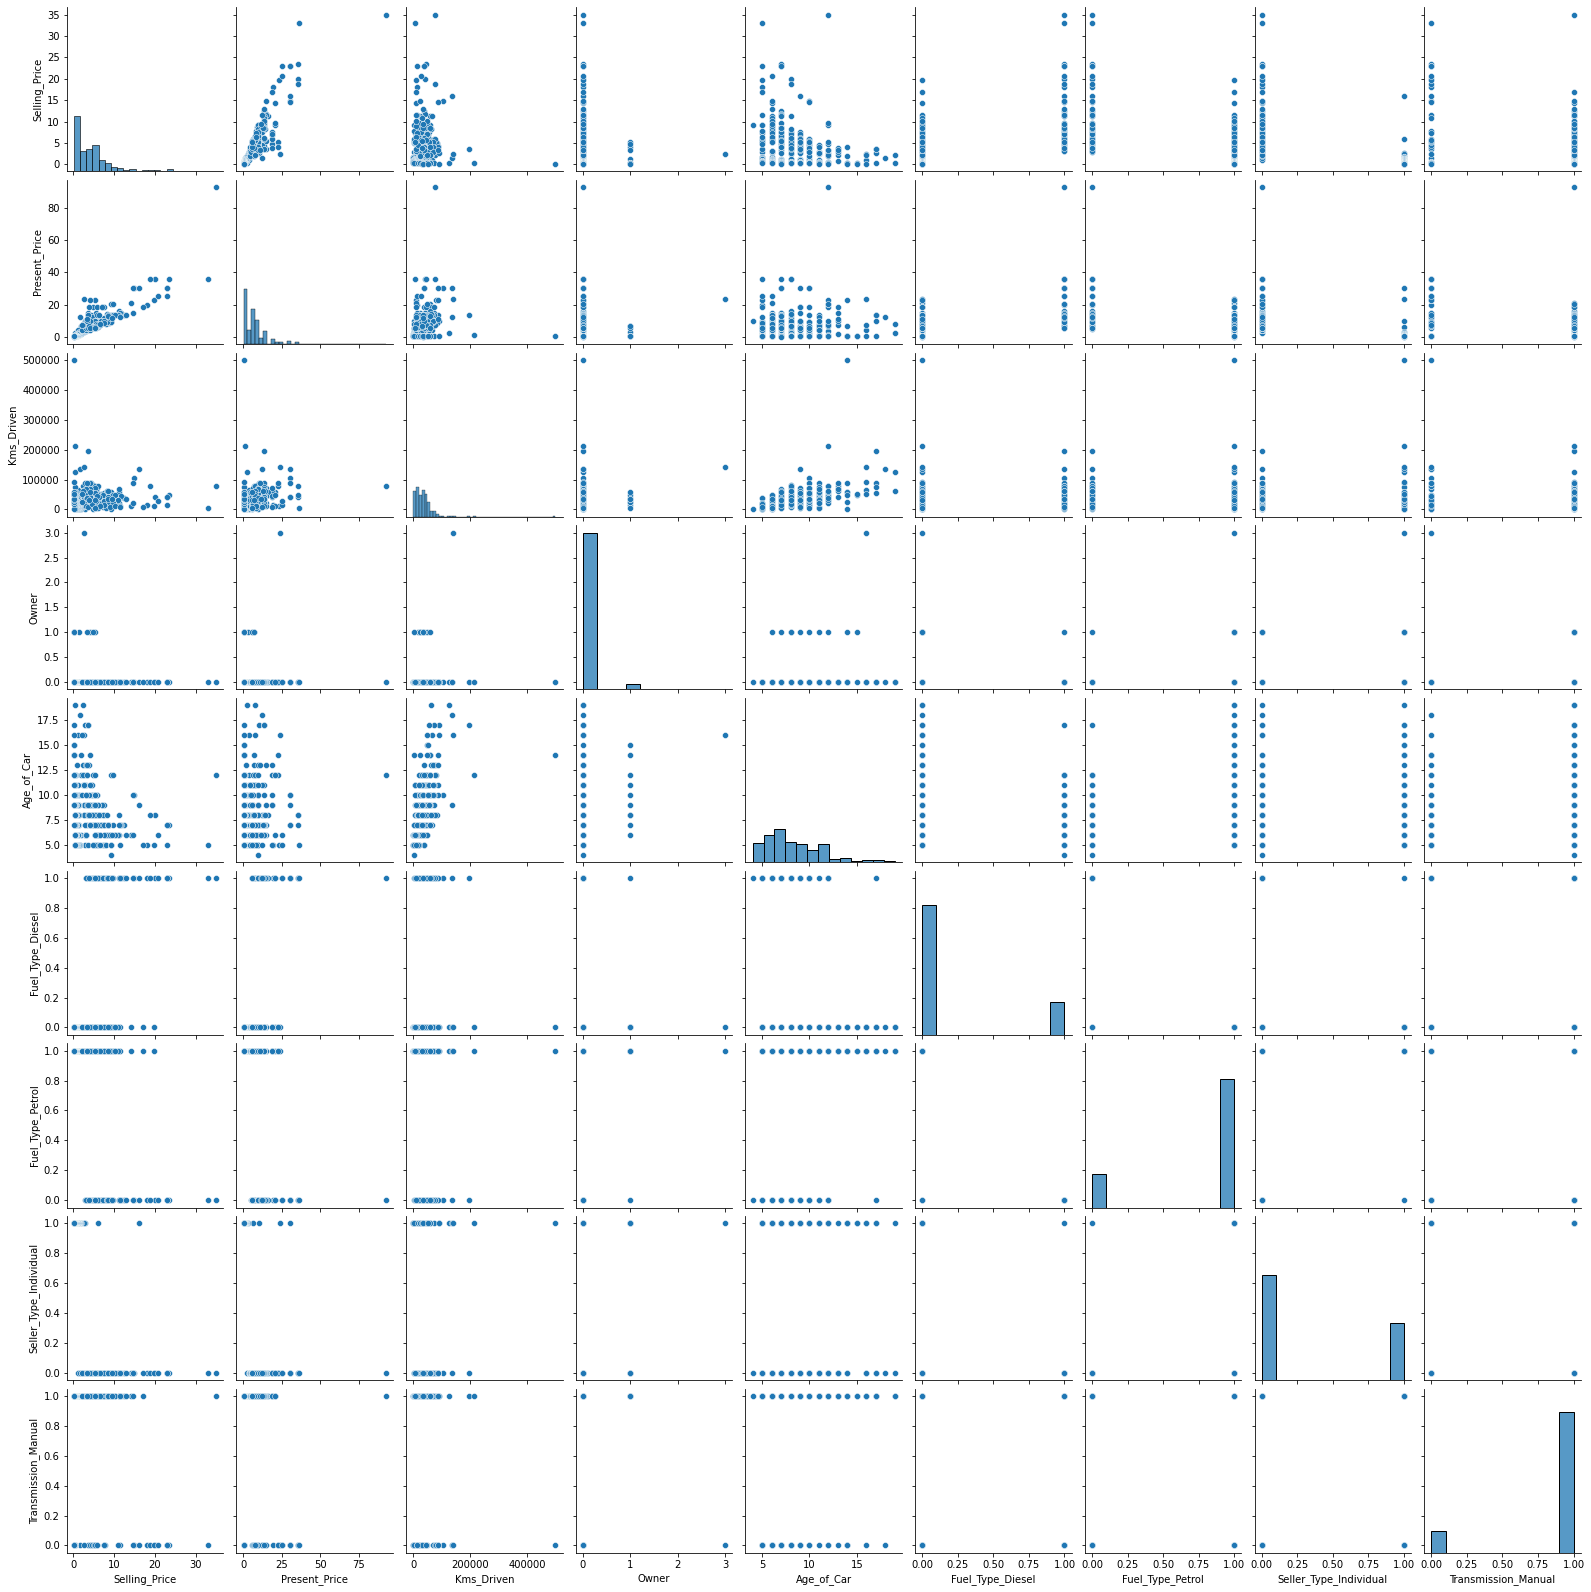

In [57]:
sns.pairplot(data)
plt.show()

In [51]:
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,8.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,4.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000
50%,3.600000,6.400000,32000.000000,0.000000,8.000000
75%,6.000000,9.900000,48767.000000,0.000000,10.000000
max,35.000000,92.600000,500000.000000,3.000000,19.000000


In [52]:
## Year is ambigious - convert to age_of_car